# Surviving Titanic 
BI Python Demo: Data Analysis with Machine Learning

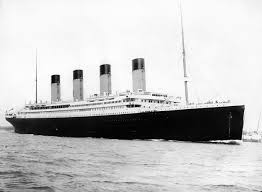

At around 2.20am on the morning of 15 April, 1912, the brand new, the biggest, and most modern for the time passanger ship RMS Titanic disappeared beneath the surface of the Atlantic Ocean, less than 3 hours after striking an iceberg on the way from Southampton to New York.
The disaster resulted in the loss of more than 1,500 lives, almost two-thirds of the people on board.

We will use the data copied from the original travel documents of the company White Star Line about the passangers who have taken the tragic trip to create a demo of solving data analytics and machine learning task.

We will build data model, which can be used for researching various factors and prediction of future imaginery facts.

Please, note, that this are not just words and numbers, but figures, associated with real people's destiny!


<img src="https://titanicfacts.net/wp-content/uploads/2018/06/titanic-boarding-pass.gif" width="120" height="120" align="right"/>

__We will implement the following procedure:__

1. Prepare the environment by importing the major Python libraries, which contain modules and functions we will need.
2. Load the available data
   - get to know what it contains
3. Prepare it for analysis
   - clean and transform the data as appropriate
4. Explore the data to reveal insights in it
   - apply visualisation for better understanding
5. Create models of the data to use for prediction
   - choose a model type
   - train a model
   - test the trained model
   - evaluate the model validity
6. Use the model for prediction of new data


## Development Environment
Import Python Libraries

In [1]:
# import pandas for structuring the data into frames
import pandas as pd

# import numpy for using numeric arrays and mathematical calculations
import numpy as np

# import matplotlib for drawing diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline

# a library for generating random numbers
import random

# sklearn - the most important library for machine learning algorithms and utilities
from sklearn import datasets, svm, tree, preprocessing, metrics
from sklearn.preprocessing import LabelEncoder

## Data Loading
For this demo we have found a __csv__ file, containing the original data. 
In other cases we can find plain text, web pages, pdf files, Word documents and Excel tables, images or even SQL databases. We collect and aggregate the available data to process all together. We have Python tools to help us with data acquisition and aggregation.

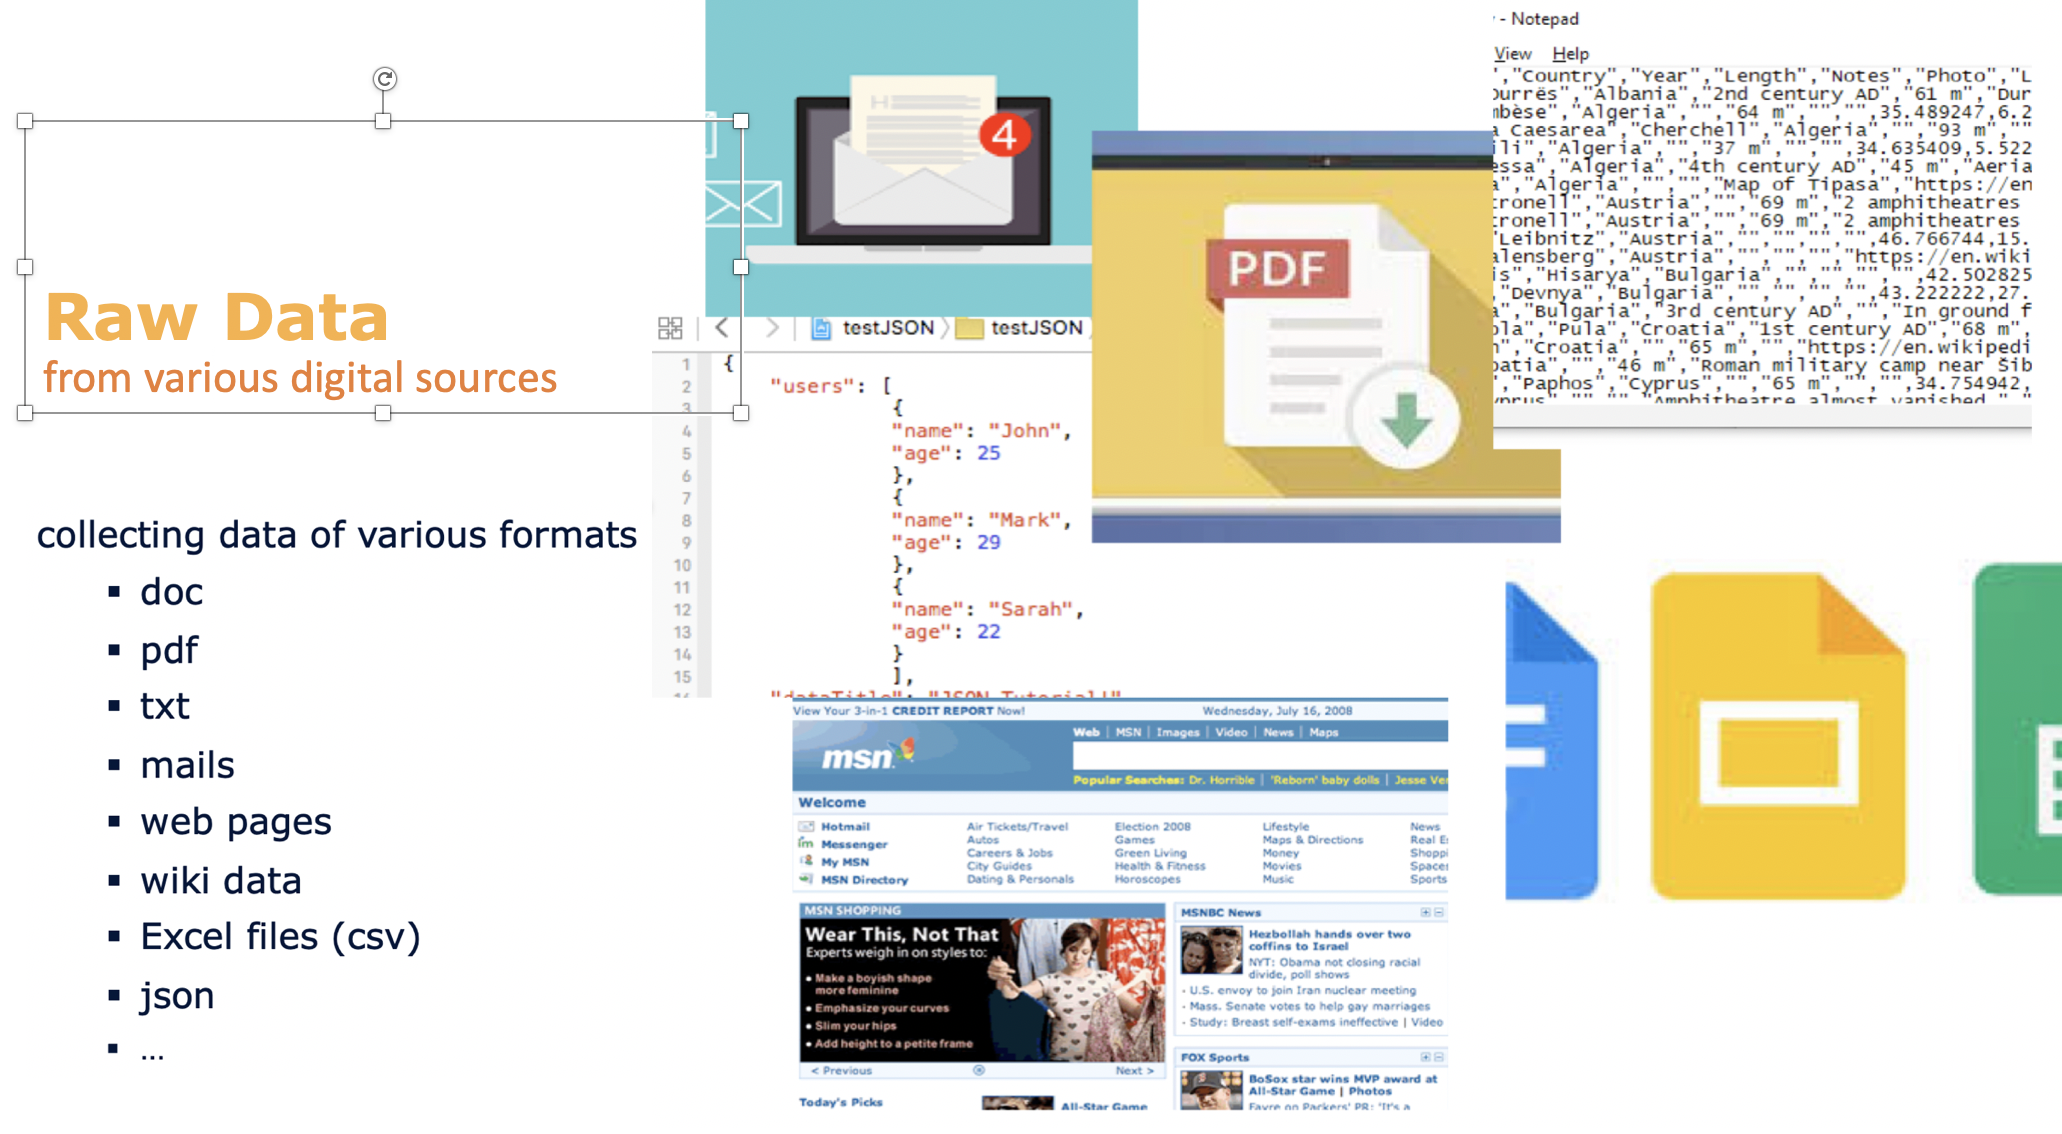

### Ingest csv File into DataFrame

In [5]:
# the data location
uri = 'https://raw.githubusercontent.com/foxdocs/dat-bi/refs/heads/main/Data/titanic-data.csv'

In [6]:
# read the data file into a Pandas data frame
df = pd.read_csv(uri, index_col=None, na_values=['NA'])

In [7]:
df

pclass  survived                             name     sex      age  \
0       1st         1    Allen, Miss. Elisabeth Walton  female  29.0000   
1       1st         1   Allison, Master. Hudson Trevor    male   0.9167   
2       1st         0     Allison, Miss. Helen Loraine  female   2.0000   
3       1st         0  Allison, Mr. Hudson Joshua Crei    male  30.0000   
4       1st         0  Allison, Mrs. Hudson J C (Bessi  female  25.0000   
...     ...       ...                              ...     ...      ...   
1304    3rd         0             Zabour, Miss. Hileni  female  14.5000   
1305    3rd         0            Zabour, Miss. Thamine  female      NaN   
1306    3rd         0        Zakarian, Mr. Mapriededer    male  26.5000   
1307    3rd         0              Zakarian, Mr. Ortin    male  27.0000   
1308    3rd         0               Zimmerman, Mr. Leo    male  29.0000   

      sibsp  parch  ticket        fare    cabin     embarked boat   body  \
0         0      0   24160  211.337494       B5  Southampton    2    NaN   
1         1      2  113781  151.550003  C22 C26  Southampton   11    NaN   
2         1      2  113781  151.550003  C22 C26  Southampton  NaN    NaN   
3         1      2  113781  151.550003  C22 C26  Southampton  NaN  135.0   
4         1      2  113781  151.550003  C22 C26  Southampton  NaN    NaN   
...     ...    ...     ...         ...      ...          ...  ...    ...   
1304      1      0    2665   14.454200      NaN    Cherbourg  NaN  328.0   
1305      1      0    2665   14.454200      NaN    Cherbourg  NaN    NaN   
1306      0      0    2656    7.225000      NaN    Cherbourg  NaN  304.0   
1307      0      0    2670    7.225000      NaN    Cherbourg  NaN    NaN   
1308      0      0  315082    7.875000      NaN  Southampton  NaN    NaN   

                            home.dest  
0                        St Louis, MO  
1     Montreal, PQ / Chesterville, ON  
2     Montreal, PQ / Chesterville, ON  
3     Montreal, PQ / Chesterville, ON  
4     Montreal, PQ / Chesterville, ON  
...                               ...  
1304                              NaN  
1305                              NaN  
1306                              NaN  
1307                              NaN  
1308                              NaN  

[1309 rows x 14 columns]

### Explore the Content

In [11]:
df.sample(3)

pclass  survived                              name     sex   age  sibsp  \
335    2nd         0        Bateman, Rev. Robert James    male  51.0      0   
735    3rd         1  Coutts, Mrs. William (Winnie \"M  female  36.0      0   
466    2nd         0                 Kantor, Mr. Sinai    male  34.0      1   

     parch       ticket    fare cabin     embarked boat   body  \
335      0  S.O.P. 1166  12.525   NaN  Southampton  NaN  174.0   
735      2   C.A. 37671  15.900   NaN  Southampton    2    NaN   
466      0       244367  26.000   NaN  Southampton  NaN  283.0   

                home.dest  
335      Jacksonville, FL  
735  England Brooklyn, NY  
466    Moscow / Bronx, NY

In [12]:
# see the size
df.shape

(1309, 14)

In [14]:
# see the first five records
df.sample(5)

pclass  survived                             name     sex   age  sibsp  \
1053    3rd         0                Nasr, Mr. Mustafa    male   NaN      0   
117     1st         1   Francatelli, Miss. Laura Mabel  female  30.0      0   
463     2nd         0     Jefferys, Mr. Ernest Wilfred    male  22.0      2   
967     3rd         0  Lindblom, Miss. Augusta Charlot  female  45.0      0   
1186    3rd         0              Samaan, Mr. Youssef    male   NaN      2   

      parch      ticket       fare cabin     embarked boat  body  \
1053      0        2652   7.229200   NaN    Cherbourg  NaN   NaN   
117       0    PC 17485  56.929199   E36    Cherbourg    1   NaN   
463       0  C.A. 31029  31.500000   NaN  Southampton  NaN   NaN   
967       0      347073   7.750000   NaN  Southampton  NaN   NaN   
1186      0        2662  21.679199   NaN    Cherbourg  NaN   NaN   

                     home.dest  
1053                       NaN  
117                        NaN  
463   Guernsey / Elizabeth, NJ  
967                        NaN  
1186                       NaN

In [17]:
# see which are the attribute labels
x=list(df)

In [18]:
x

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

#### Data Types
Get an overview of data types and storage

In [ ]:
type(df)

In [19]:
# data types of the attributes (columns)
df.dtypes

pclass        object
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [20]:
# data types and status
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   object 
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 143.3+ KB


#### Missing Data

In [ ]:
# see the current quantity of data
df.count()

In [21]:
# count the missing values in each attribute
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## Data Preprocessing
Prepare the data for analysis

### Process the Missing Values

#### Age

In [ ]:
# replace the missing 'age' with the average age
mean_age = df.age.mean()
mean_age

In [ ]:
df['age'] = df['age'].fillna(mean_age)
df['age'].sample(5)

#### Embarked

In [ ]:
# replace the missing 'embarked' with the mode
# mode of a set of values is the value that appears most often, it could be more than one, so we take [0]
mode_emb = df['embarked'].mode()[0]
mode_emb

In [ ]:
# replace the missing 'embarked' with the mode
df['embarked'] = df['embarked'].fillna(mode_emb)
df['embarked'].sample(5)

#### Home Destination

In [ ]:
# fill the missing home destination with 'NA'
df["home.dest"] = df["home.dest"].fillna("NA")
df["home.dest"].sample(5)

In [ ]:
# see the current state of nill values
df.isnull().sum()

#### Fare
Replace missing 'fare' with the average for __its pclass__

In [ ]:
# calculate the avarages per class
cat_means = df.groupby('pclass')['fare'].mean()
cat_means

In [ ]:
# find and mask with either True or False the rows, where the fare is missing?
row_mask = df['fare'].isna()

In [ ]:
# for a test, check which rows have True as a mask
row_mask[row_mask == True]

The .loc and .iloc are used for selecting specific subsets of the dataframe, addressing the data either by name or index.

In [ ]:
row_mask.iloc[1225]

In [ ]:
# apply the cat_means mapping on the rows masked with True
df.loc[row_mask, 'fare'] = df.loc[row_mask, 'pclass'].map(cat_means)

In [ ]:
# see the current state of null values
df.isnull().sum()

#### Body

In [ ]:
# survived
dfsu = df[df['survived'] == 1]

In [ ]:
# didn't survive
dfno = df[df['survived'] == 0]

In [ ]:
# body found
dfbo = df[df['body'].notna()]

In [ ]:
# body not found
diff = pd.concat([dfno, dfbo], ignore_index=True)
# keep only the rows that appear only once
notf = diff.drop_duplicates(keep=False) 

In [ ]:
# people not found
notf.sample(5)

### Remove Attributes

In [ ]:
# remove columns, which are not informative anymore for the research
df = df.drop(['body','ticket'], axis=1)

** axis=0 means a row-wise operation; axis=1 means a column-wise operation 

### Remove Duplicates

In [ ]:
# identify duplicates
df.duplicated().sum()

In [ ]:
# remove duplicates
df = df.drop_duplicates()

### Transform Data Types

#### Round the Floats

In [ ]:
df['age'] = df['age'].round(1)

In [ ]:
df['fare'] = df['fare'].round(2)

In [ ]:
df.sample(2)

#### Convert String to Numeric

  __Extract Digits from Text__

In [ ]:
# clean and convert string to int
df['pclass'] = df['pclass'].str.extract('(\d+)').astype(int)

In [ ]:
df.dtypes

   __Convert String to Label__

As a preprocessing, we will convert the strings into integer keys, making it easier for the  algorithms to find patterns. We use a method from the class __LabelEncoder__.
- “female” and “male” are categorical values and will be labeled with 0 and 1 respectively
- similar with cities of embarkment

In [ ]:
# create an instance of the class
le = LabelEncoder()

In [ ]:
# use the instance to call a method for transformation
df.sex = le.fit_transform(df.sex)

In [ ]:
# use the instance to call a method for transformation
# df.embarked = le.fit_transform(df.embarked)

In [ ]:
df.sample(5)

### Generate New Attributes
Discover the location of the passengers'cabins

In [ ]:
# Find unique cabins
cabins = df['cabin'].unique().size
cabins

In [ ]:
# the first letter in cabin gives the deck
df['deck'] = df['cabin'].str.get(0) 

In [ ]:
df.isnull().sum()

In [ ]:
# remove all rows without cabin and store the subset in anothe dataframe
dfc = df.copy()

In [ ]:
dfc.shape

In [ ]:
dfc.isnull().sum()

In [ ]:
dfc = dfc.dropna(subset=["cabin"])

In [ ]:
dfc.isnull().sum()

In [ ]:
# here all have cabin and deck
dfc.head()

In [ ]:
# take the first cabin only
dfc['cabin'] = dfc['cabin'].str.split(' ').str[0]

In [ ]:
# get the cabin digits only
dfc['cabn'] = dfc['cabin'].str.extract(r'(\d+)', expand=False)

In [ ]:
# clean
dfc = dfc.dropna(subset=["cabn"])

In [ ]:
# convert to  int
dfc['cabn'] = dfc['cabn'].astype(int)

In [ ]:
dfc.dtypes

In [ ]:
# test
df[df['home.dest'].str.contains('Denmark', case=False, na=False)]

## Explorative Analysis

In [ ]:
# get some insights of the value scope
df.describe()

In [ ]:
# Draw histograms for each feature
df.hist()
plt.show()

In [ ]:
df['survived'].value_counts()

In [ ]:
# Numeric data can also be plotted 
df['survived'].value_counts().plot(kind='bar')

Incredibly low % of survivals: 38% <br>
Titanic was only carrying 20 lifeboats for 1317 passengers and 885 crew members aboard!

In [ ]:
# Non-numeric data is not included in the statistic above, but can be plotted
df['embarked'].value_counts().plot(kind='bar')

#### Cabin Location

In [ ]:
# Find unique cabins
cabins = df['cabin'].unique().size
cabins

In [ ]:
df['deck'] = df['cabin'].str.get(0) 
df['deck'].value_counts().plot(kind='bar')

In [ ]:
dfc.shape

In [ ]:
labels = ['front', 'mid', 'aft']
ranges = [0, 50, 100, 150]

# bin data based on range of possible values
dfc['sector'] = pd.cut(dfc['cabn'], ranges, labels=labels)

In [ ]:
dfc['sector'].value_counts().plot(kind='bar')

In [ ]:
# surviving sector
sec = dfc.groupby([dfc.sector, 'survived']).count()
sec

In [ ]:
sec['name'].plot.bar()

In [ ]:
dfc['deck'].value_counts().plot(kind='bar')

In [ ]:
# surviving deck
sec = dfc.groupby([dfc.deck, 'survived']).count()
sec

In [ ]:
sec['name'].plot.bar()

#### Social status

In [ ]:
# Did the social class matter?
social = df.groupby('pclass').count()
social

In [ ]:
# plot all
social['survived'].plot.bar()

In [ ]:
# Did the social class matter?
social = df.groupby(['pclass', 'survived']).count()
social['name'].plot.bar()

#### Gender

In [ ]:
# Did the gender matter?
gender = df.groupby(['survived', 'sex'])['name'].count()
gender

In [ ]:
# plot
gender.plot.pie()

In [ ]:
# gender by class
gender_by_class = df.groupby(['pclass','sex']).count()
gender_by_class

In [ ]:
# plot
gender_by_class['survived'].plot.area()

#### Age

In [ ]:
# We need to split it into groups (bins)
ranges = [0,10,20,30,40,50,60,70,80] 
age=df.groupby([(pd.cut(df.age, ranges))])['name'].count()
age

In [ ]:
# average per range
age_by_gender=df.groupby([(pd.cut(df.age, ranges)), 'sex']).count()
age_by_gender

In [ ]:
# plot
age_by_gender['survived'].plot.bar()

#### Fare by Age

In [ ]:
# Generate scatter plot 
plt.scatter(df['age'], df['fare'],  marker="o", picker=True)
plt.title(f'Fare by Age')
plt.xlabel('age')
plt.ylabel('money paid')
plt.show()

## Predictive Analysis
We use Machine Learning algorithms to train model, which can be used for prediction of future events.

Here is the procedure, we always follow.

### Prepare the Data

In [ ]:
dff = df.copy()

In [ ]:
dff.info()

In [ ]:
dff = dff.drop(['name', 'cabin', 'home.dest', 'boat', 'embarked', 'deck'], axis=1)

In [ ]:
dff.columns

In [ ]:
# dff=pd.get_dummies(dff, columns = ['embarked', 'deck']) 

### Split the Data
1. Split the data into input and output
2. Split the data into train and test sets

In [ ]:
# Split the data into input and output
X = dff.drop(['survived'], axis=1).values
y = dff['survived'].values

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
# Split the data into train and test sets
# 80% of the dataset will be used for training and 20% will be used for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

### Train a Model
Select a method and train a model.
The choice of method and algorithm depends on the task and the type of data.

In [ ]:
# Here we select Decision Tree algorithm
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=4)

In [ ]:
# Train a decision tree model based on our training data
dt.fit(X_train, y_train)

In [ ]:
# Validate the model
dt.score (X_test, y_test)

The resulting value is the model accuracy. It means that the model correctly predicted the survival of this % of the test set. Not bad for start!

In [ ]:
# Try another method
import sklearn.ensemble as ske
rf = ske.RandomForestClassifier(n_estimators=50)
rf.fit (X_train, y_train)
rf.score (X_test, y_test)

In [ ]:
# Try another method
import sklearn.ensemble as ske
gb = ske.GradientBoostingClassifier(n_estimators=50)
gb.fit (X_train, y_train)
gb.score (X_test, y_test)

In [ ]:
# Try combining methods
import sklearn.ensemble as ske

In [ ]:
eclf = ske.VotingClassifier([('dt', dt), ('rf', rf), ('gb', gb)])
eclf.fit (X_train, y_train)
eclf.score (X_test, y_test)

### Test the Model
Once the model is trained we can use it to predict the survival of passengers in the test data set, and compare these to the known survival of each passenger using the original dataset.

### Evaluate the Performance with Our Test Data

In [ ]:
# Test the classifier with the test input data
prediction = dt.predict(X_test)

In [ ]:
prediction

In [ ]:
# Evaluate classifier performance
from sklearn.metrics import classification_report
class_names = ['Non-survival', 'Survival']
print("\n" + "#"*40)

print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, eclf.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, prediction, target_names=class_names))

### Evaluate the Performance with New Data

In [ ]:
list(X_test)[0]

In [ ]:
# Enter a new data set for a person
# my_set1 = ([[3,1, 26.00,0,0,7.78]])
my_set2 = ([[ 3.  ,  1.  , 42.  ,  0.  ,  0.  ,  7.65 ]])
# my_set3 = ([[3.    ,   1.    ,  29.    , 0,   0.    ,   7.875 ,   0.   ]])

In [ ]:
prediction = eclf.predict(my_set2)
prediction

In [ ]:
list(y_test)[0]

### Plot the Decision Tree

In [ ]:
# Install the graphviz package for DT visualisation
!pip install graphviz

In [ ]:
# from utilities import visualize_classifier
import graphviz

In [ ]:
fnames = dff.columns[dff.columns != dff.columns[1]]
fnames

In [ ]:
# draw tree from the trained data using the graphviz package
tree_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=fnames, class_names = True,        
                         filled=True, rounded=True, proportion = False,
                         special_characters=True)

In [ ]:
# result DT saved in file tittree.pdf
graph = graphviz.Source(tree_data)
graph.render("Titanic") 

In [ ]:
# show it here
graph 

### Store the Model for Future Use

In [ ]:
# joblib is a set of tools
import joblib 

In [ ]:
# give a name to the file, ‘.sav’ or ‘.pkl’ extension
filename = 'my_model.sav'
# save the model with joblib's function dump()
joblib.dump(dt, filename)

### Load Stored Model

In [ ]:
# load model with joblib's function load() in any other application
filename = 'my_model.sav'
loaded_model = joblib.load(filename)

In [ ]:
# start using it in this application, no more training is needed
y_predict = loaded_model.predict(X_test)

In [ ]:
# check results
print(classification_report(y_test, y_predict)) 

## Reference
- <a href = "https://en.wikipedia.org/wiki/RMS_Titanic">Titanic</a>
- <a href = "https://titanicfacts.net/">Titanic Facts</a>
- <a href = "https://www.kaggle.com/c/titanic/data">Data</a>

# Process

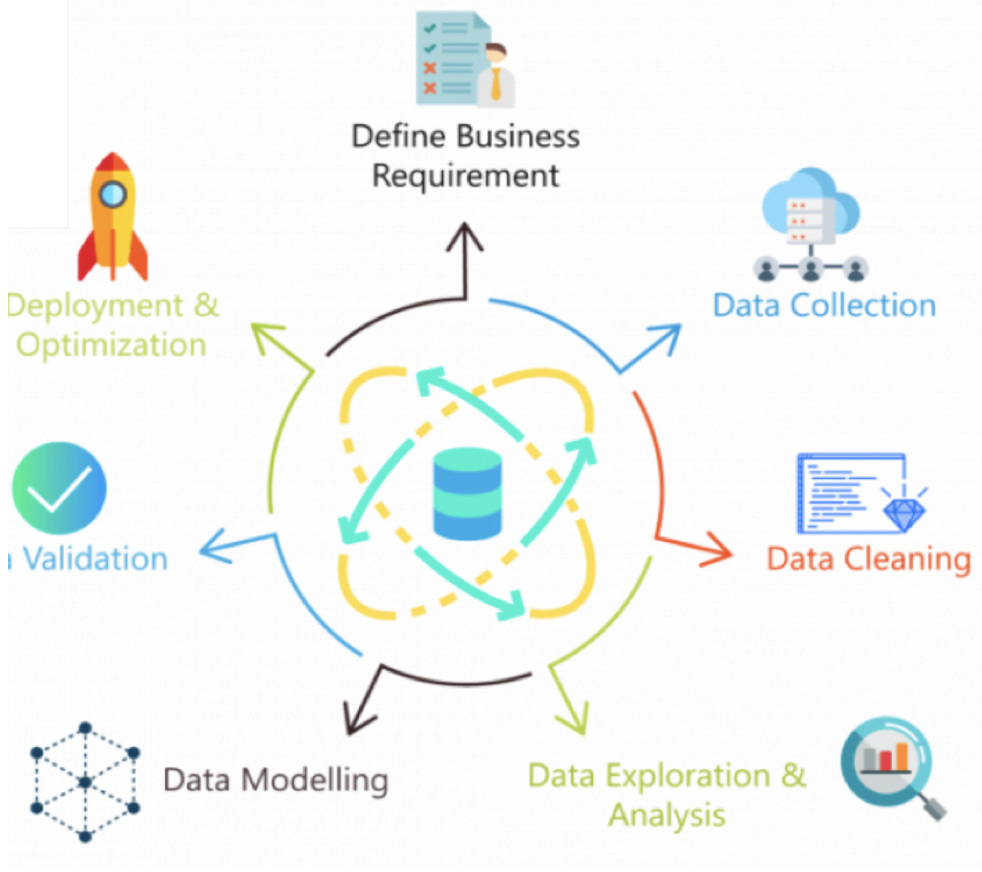

In [2]:
import pandas as pd

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Wholesale%20customers%20data.csv")

In [10]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Banking_Marketing.csv', header=0)

In [7]:
df.head()

age          job  marital          education  default housing loan  \
0  44.0  blue-collar  married           basic.4y  unknown     yes   no   
1  53.0   technician  married            unknown       no      no   no   
2  28.0   management   single  university.degree       no     yes   no   
3  39.0     services  married        high.school       no      no   no   
4  55.0      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4          93.444          -36.1      4.963       5228.1  0  
1         -0.1          93.200          -42.0      4.021       5195.8  0  
2         -1.7          94.055          -39.8      0.729       4991.6  1  
3         -1.8          93.075          -47.1      1.405       5099.1  0  
4         -2.9          92.201          -31.4      0.869       5076.2  1  

[5 rows x 21 columns]